# K-MEANS TITANIC

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Cargar el dataset Mall_Customers
dataset = pd.read_csv("Titanic-Dataset.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.shape

(891, 12)

In [26]:
#Eliminar la columna especificada
data = dataset.drop(['Name', 'Sex', 'Parch', 'Cabin', 'Ticket', 'Embarked'], axis=1)

In [27]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
0,1,0,3,22.0,1,7.2500
1,2,1,1,38.0,1,71.2833
2,3,1,3,26.0,0,7.9250
3,4,1,1,35.0,1,53.1000
4,5,0,3,35.0,0,8.0500


In [28]:
#Validar estadisticas generales del dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,512.329200


In [29]:
#Validar cantidad de valores nulos
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Fare             0
dtype: int64

In [30]:
#Eliminar valores nulos en coso de que tengamos nulos
data.dropna()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
0,1,0,3,22.0,1,7.2500
1,2,1,1,38.0,1,71.2833
2,3,1,3,26.0,0,7.9250
3,4,1,1,35.0,1,53.1000
4,5,0,3,35.0,0,8.0500
...,...,...,...,...,...,...
885,886,0,3,39.0,0,29.1250
886,887,0,2,27.0,0,13.0000
887,888,1,1,19.0,0,30.0000
889,890,1,1,26.0,0,30.0000


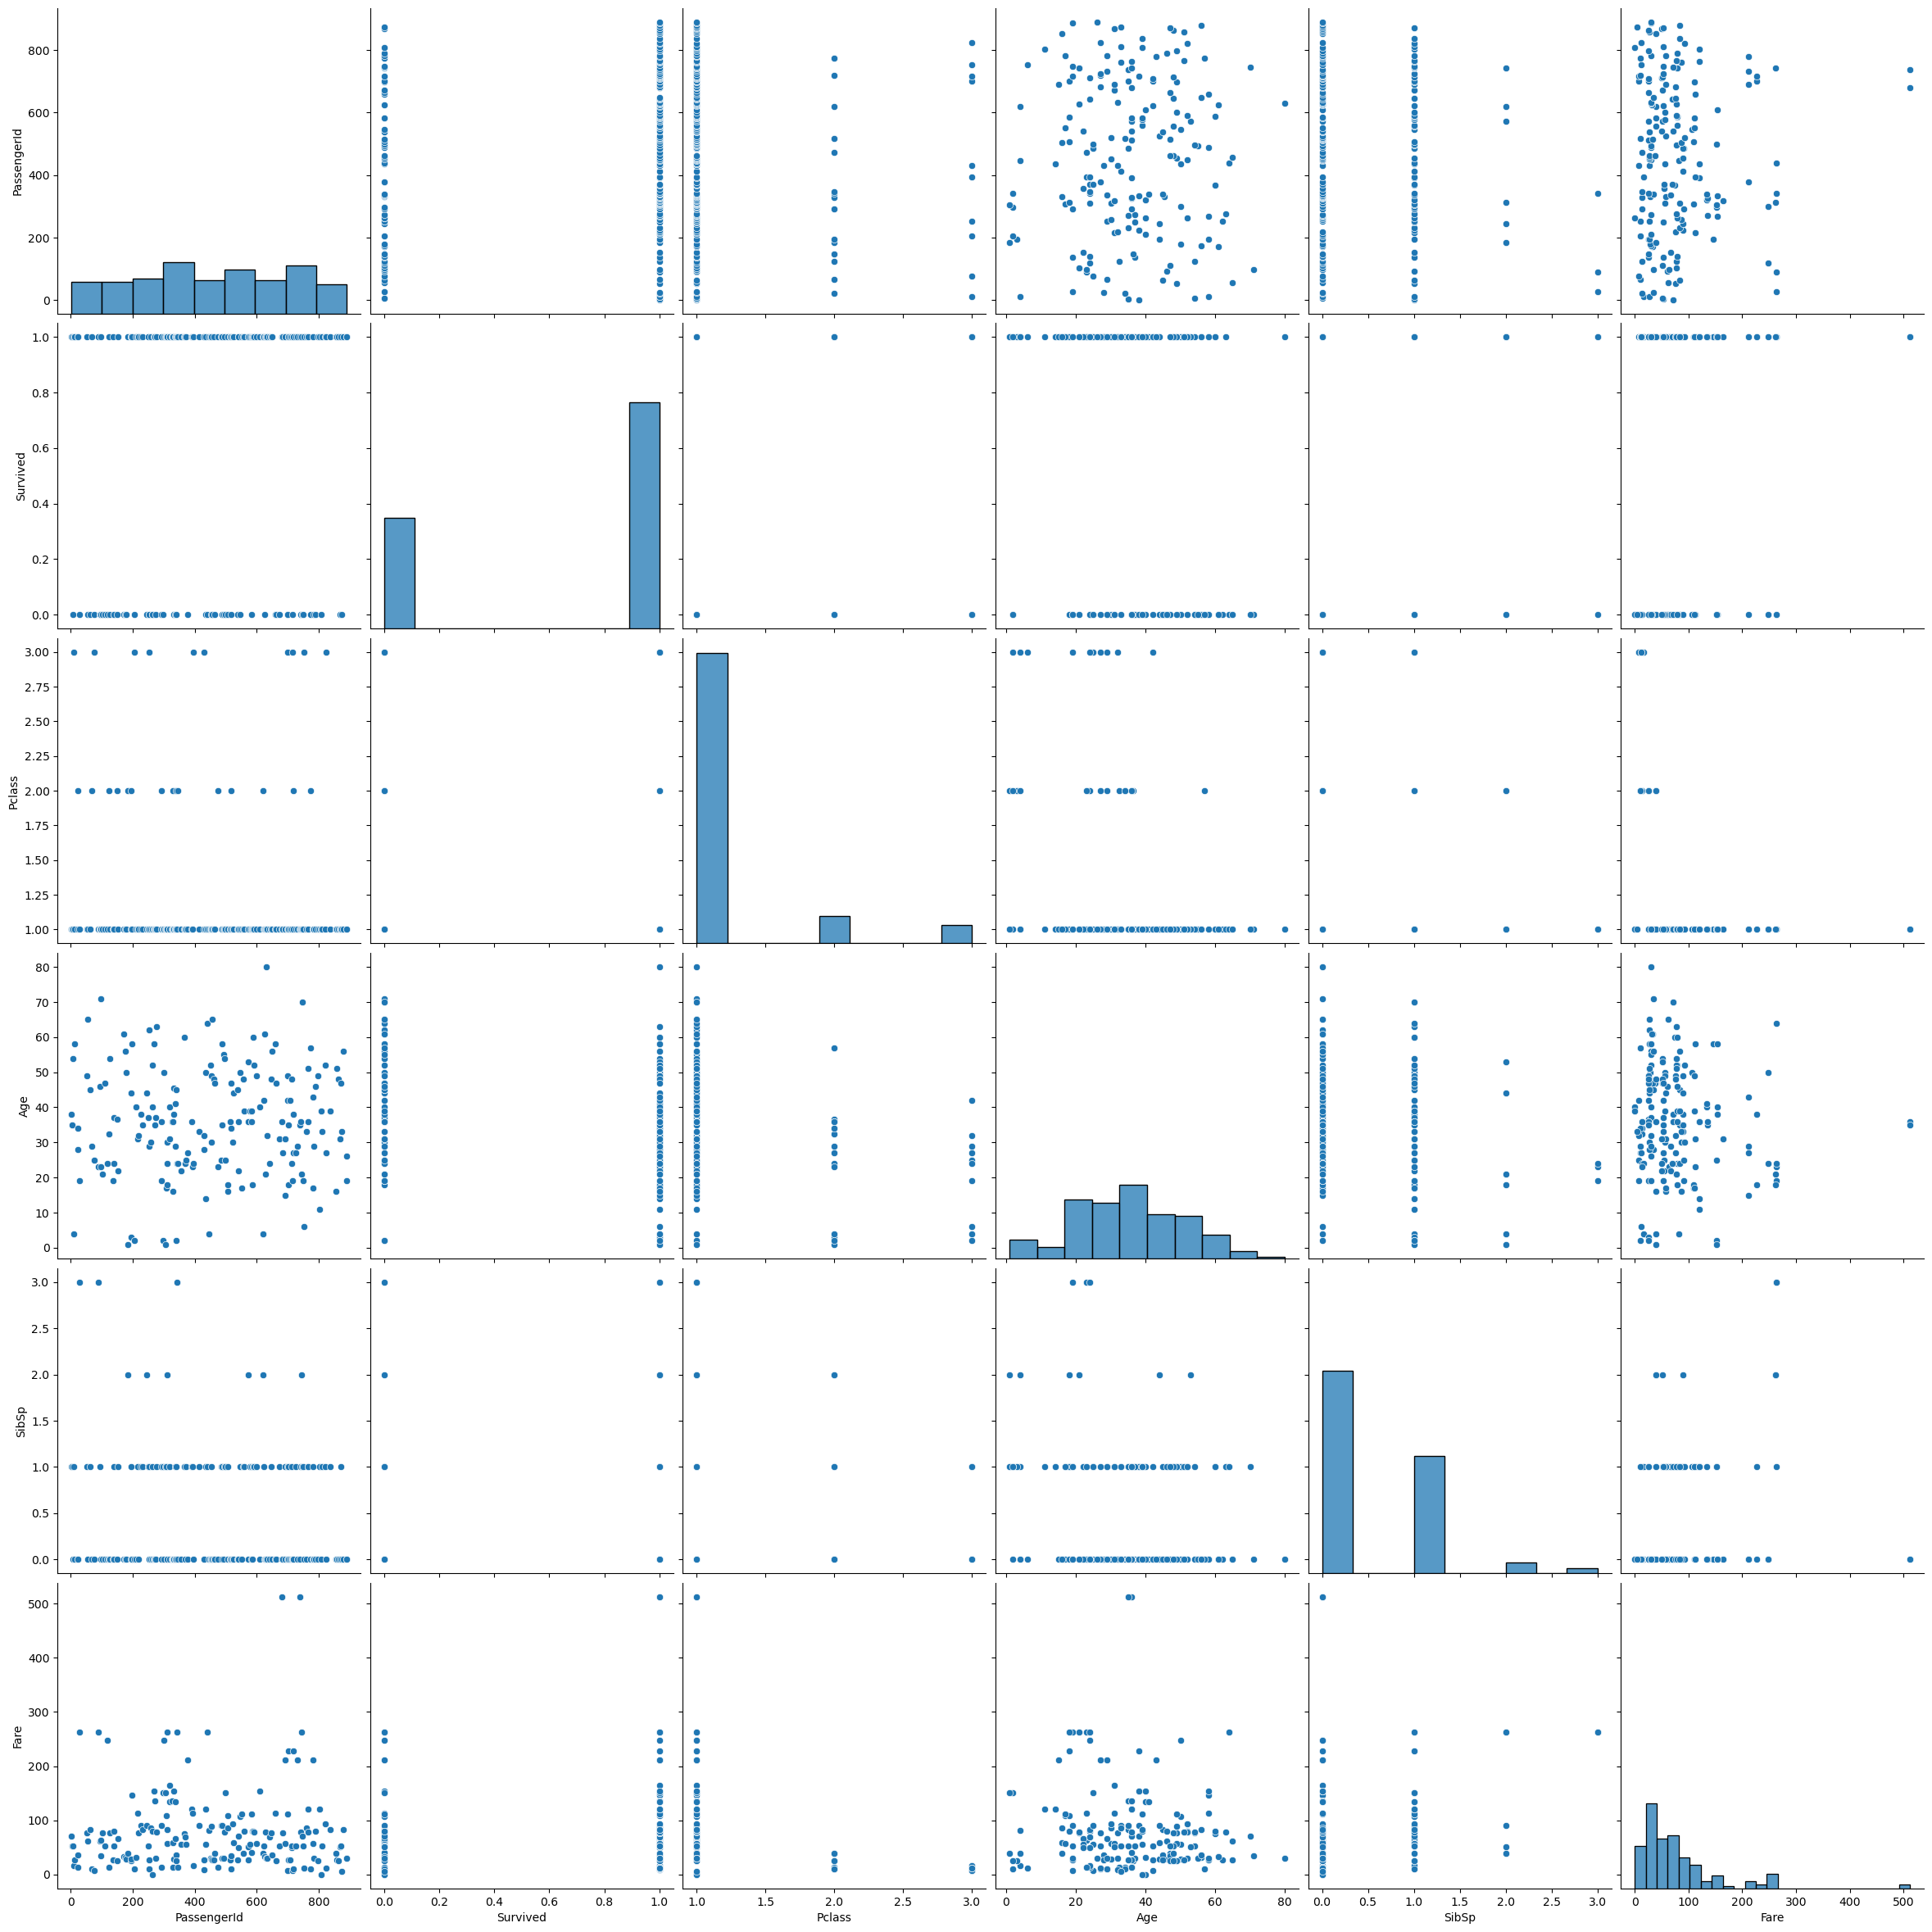

In [16]:
#Generar diagramas de dispersión 
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [31]:
#Validar matriz de correlación 
corr_matrix = data.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.159651
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,1.000000


<Axes: >

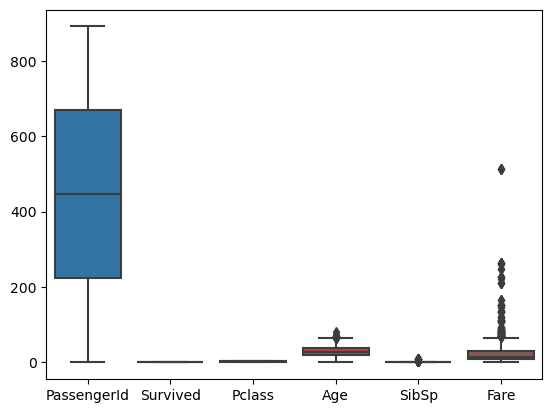

In [32]:
#Diagramas de caja para cada variable
sns.boxplot(data=data)

In [33]:
#Estandarizar datos(A cada valor le resta la media y se divide en la desviación estandar)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,PassengerId,Survived,Pclass,Age,SibSp,Fare
0,-1.730108,-0.789272,0.827377,-0.530377,0.432793,-0.502445
1,-1.726220,1.266990,-1.566107,0.571831,0.432793,0.786845
2,-1.722332,1.266990,0.827377,-0.254825,-0.474545,-0.488854
3,-1.718444,1.266990,-1.566107,0.365167,0.432793,0.420730
4,-1.714556,-0.789272,0.827377,0.365167,-0.474545,-0.486337
...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-0.185937,-0.474545,-0.386671
887,1.718444,1.266990,-1.566107,-0.737041,-0.474545,-0.044381
888,1.722332,-0.789272,0.827377,NaN,0.432793,-0.176263
889,1.726220,1.266990,-1.566107,-0.254825,-0.474545,-0.044381


In [40]:
# Cargar el dataset
data_path = 'Titanic-Dataset.csv'
df = pd.read_csv(data_path)

In [42]:
# Preprocesamiento de datos
# Convertir el género a una variable numérica
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [53]:
# Seleccionar características
X = df[['Sex']]

# k-means

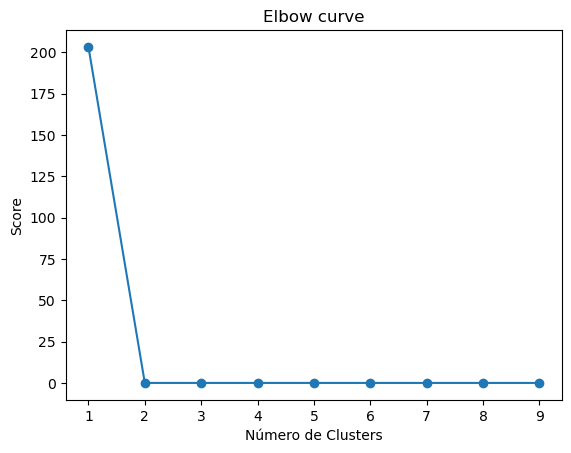

In [54]:
# Imputar valores NaN
#imputer = SimpleImputer(strategy='mean')
#X = imputer.fit_transform(X)

# Determinar el número óptimo de clusters usando el método del codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
# Calcular el puntaje para cada modelo
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]
score
# Graficar el método del codo
plt.plot(Nc, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow curve')
plt.show()

In [64]:
#Hallar los centroids mediante la cantidad de Clusters analizados anteriormente
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[2.22044605e-16],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00]])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


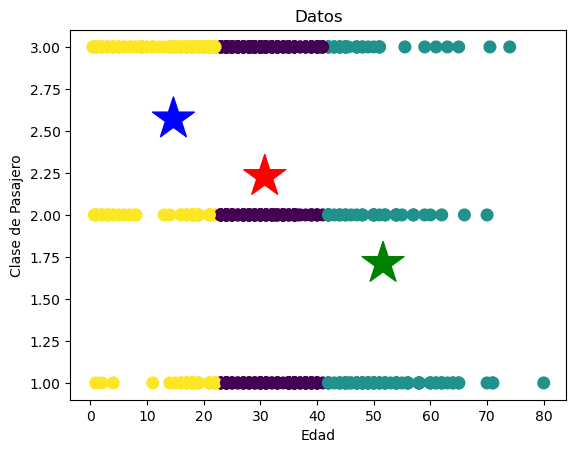

In [75]:
print(df.columns)

# Asegúrate de que la columna 'Age' exista en el DataFrame
if 'Age' not in df.columns:
    raise KeyError("La columna 'Age' no existe en el DataFrame.")

# Convertir la columna 'Sex' a valores numéricos si no lo están
if df['Sex'].dtype == 'object':
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Asegurarse de que no hay valores NaN en las columnas utilizadas
df = df[['Age', 'Pclass']].dropna()

# Asumiendo que ya has entrenado un modelo KMeans y tienes las variables asignar, C y colores
# Ejemplo para `asignar`, `C` y `colores`:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Age', 'Pclass']])
asignar = kmeans.labels_
C = kmeans.cluster_centers_
colores = ['r', 'g', 'b']

# Plotear los datos
f1 = df['Age'].values
f2 = df['Pclass'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos')
plt.xlabel('Edad')
plt.ylabel('Clase de Pasajero')
plt.show()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


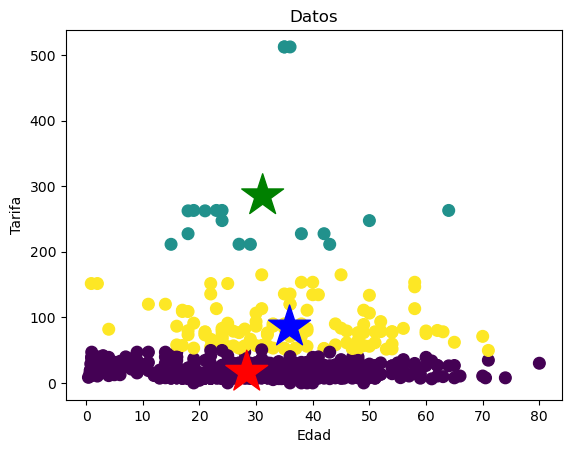

In [82]:
# Cargar el dataset
data_path = 'Titanic-Dataset.csv'  # Reemplaza con la ruta a tu dataset
df = pd.read_csv(data_path)
# Verificar las columnas disponibles
print(df.columns)

# Verificar que las columnas 'Age' y 'Fare' existan en el DataFrame
required_columns = ['Age', 'Fare']
for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"La columna '{col}' no existe en el DataFrame.")

# Asegurarse de que no hay valores NaN en las columnas utilizadas
df = df[['Age', 'Fare']].dropna()

# Asumiendo que ya has entrenado un modelo KMeans y tienes las variables asignar, C y colores
# Ejemplo para `asignar`, `C` y `colores`:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Age', 'Fare']])
asignar = kmeans.labels_
C = kmeans.cluster_centers_
colores = ['r', 'g', 'b']

# Plotear los datos
f1 = df['Age'].values
f2 = df['Fare'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


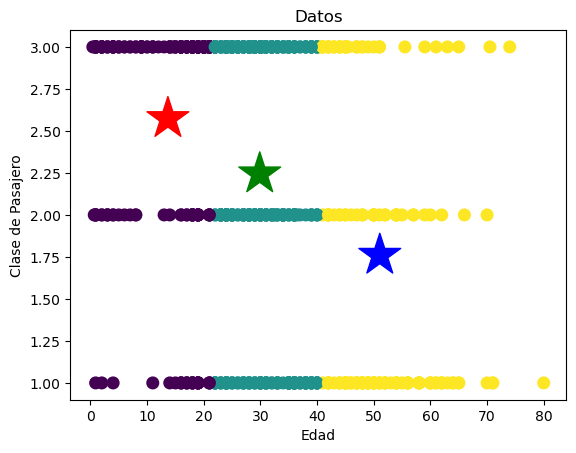

In [86]:
# Cargar el dataset
data_path = 'Titanic-Dataset.csv'  # Reemplaza con la ruta a tu dataset
df = pd.read_csv(data_path)

# Verificar las columnas disponibles
print(df.columns)

# Verificar que las columnas 'Age' y 'Pclass' existan en el DataFrame
required_columns = ['Age', 'Pclass']
for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"La columna '{col}' no existe en el DataFrame.")

# Asegurarse de que no hay valores NaN en las columnas utilizadas
df = df[['Age', 'Pclass']].dropna()

# Entrenar el modelo KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Age', 'Pclass']])
asignar = kmeans.labels_
C = kmeans.cluster_centers_
colores = ['r', 'g', 'b']

# Plotear los datos
f1 = df['Age'].values
f2 = df['Pclass'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos')
plt.xlabel('Edad')
plt.ylabel('Clase de Pasajero')
plt.show()

In [88]:
#Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 1.0
Índice de Calinski-Harabasz: 1.0
Inertia (suma de cuadrados dentro de los clusters): 30004.522626307193
Davies-Bouldin Index: 0.0


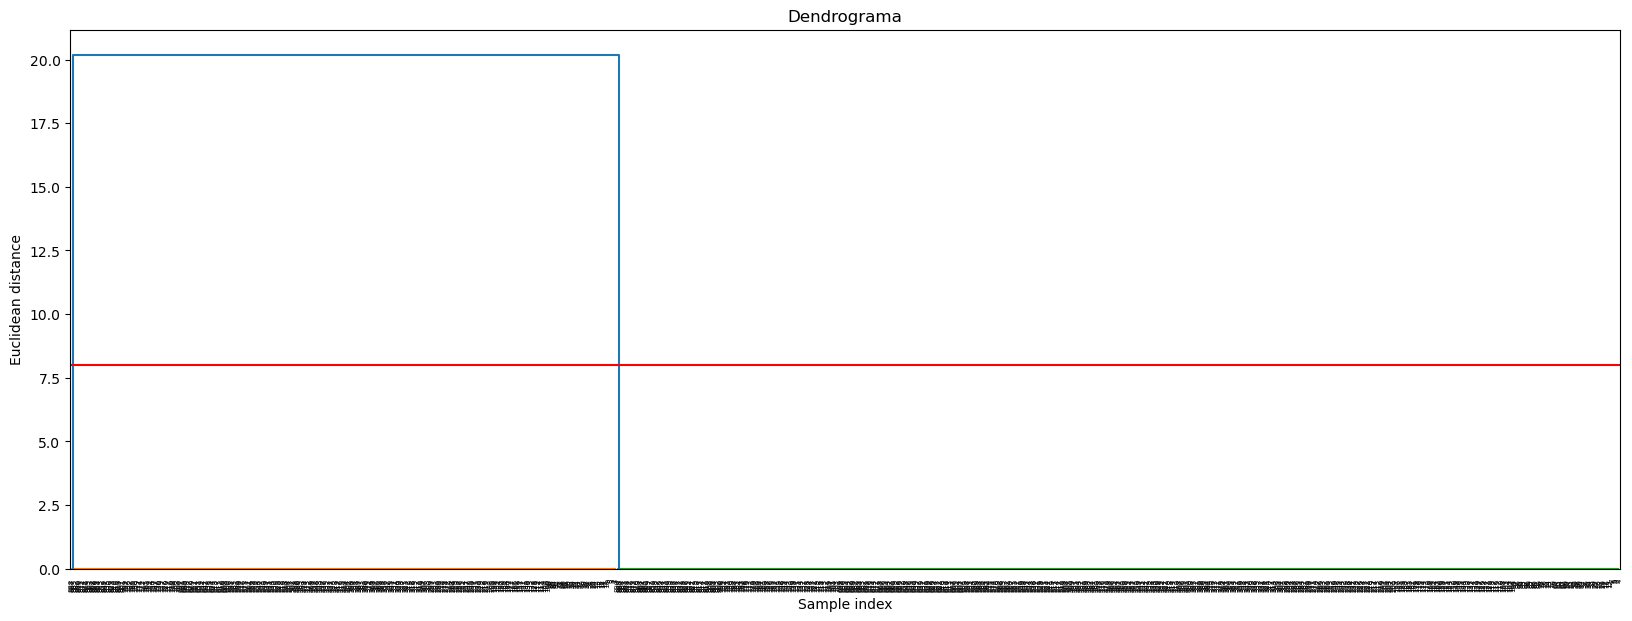

In [89]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 8, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [90]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


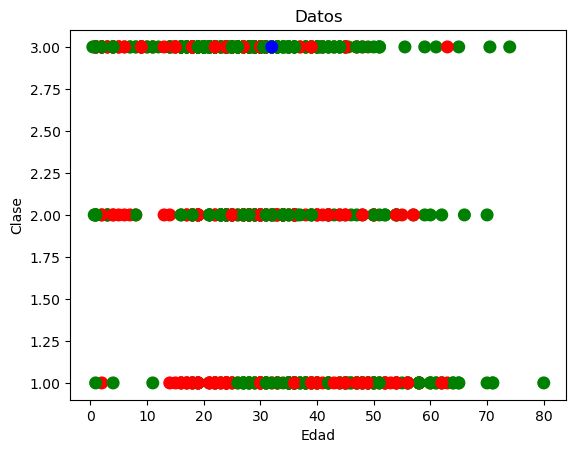

In [97]:
# Cargar el dataset
data_path = 'Titanic-Dataset.csv'  # Reemplaza con la ruta a tu dataset
df = pd.read_csv(data_path)

# Verificar las columnas disponibles
print(df.columns)

# Verificar que las columnas 'Age' y 'Pclass' existan en el DataFrame
required_columns = ['Age', 'Pclass']
for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"La columna '{col}' no existe en el DataFrame.")
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['r','g','b']
asignar=[]
for row in labels:
    asignar.append(colores[row])
    
f1 = df['Age'].values
f2 = df['Pclass'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos')
plt.xlabel('Edad')
plt.ylabel('Clase')
plt.show()

In [98]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

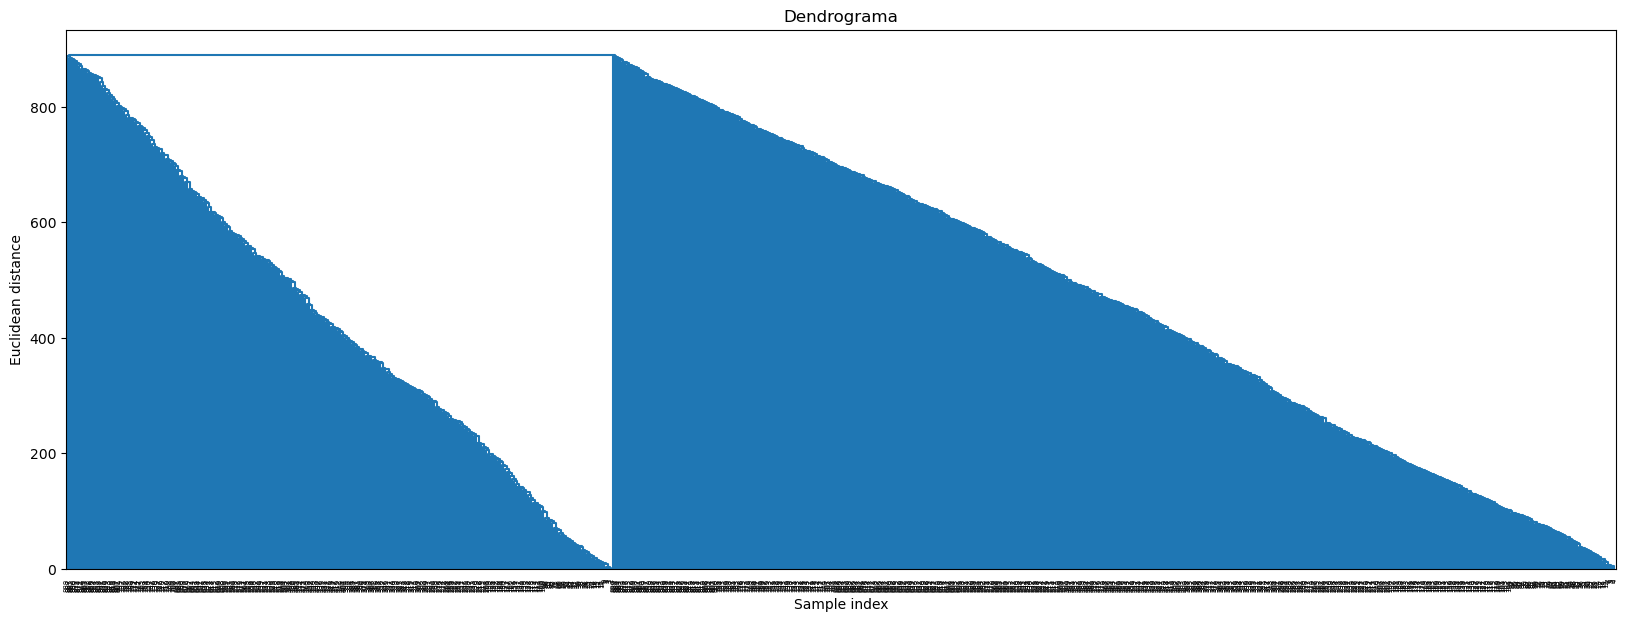

In [99]:
plot_dendrogram(hier_clustering, color_threshold=0)

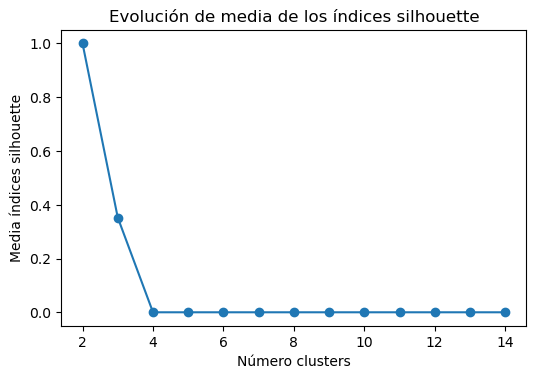

In [100]:
# Método silhouette para identificar el número óptimo de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [101]:
#Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.35241301907968575
Índice de Calinski-Harabasz: 1.0
Davies-Bouldin Index: 0.0


In [102]:
#Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
#Compute the distances
X_dist = pdist(X)
#Compute the linkage matrix
Z = linkage(X, 'ward')
#Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (1.0000000000000004, array([20.16642318, 20.16642318, 20.16642318, ..., 20.16642318,
       20.16642318,  0.        ]))


# Interpretación y análisis de los resultados del clustering.

El análisis de medidas de calidad para clustering jerárquico proporciona información sobre la cohesión y la separación de los clusters generados.

Puntaje de Silueta (Silhouette Score): El puntaje de silueta es una medida de cuán similares son un objeto a su propio cluster en comparación con otros clusters. El valor del puntaje de silueta varía entre -1 y 1. Un puntaje de silueta alto indica que el objeto está bien emparejado con su propio cluster y mal emparejado con los clusters vecinos. Un valor de 0 indica que el objeto está en el límite de decisión entre dos clusters. En este caso, el puntaje de silueta es 0.35, lo cual es razonablemente bueno. Un valor positivo indica que los clusters son densos y bien separados, mientras que un valor negativo indica que pueden existir clusters superpuestos.

Índice de Calinski-Harabasz: El índice de Calinski-Harabasz es una medida de cuán densos y separados están los clusters en comparación con la dispersión dentro de los clusters. Cuanto mayor sea el valor del índice de Calinski-Harabasz, más definidos y separados estarán los clusters. Un valor de 1.0 indica que los clusters están bien definidos y separados. En este caso, el valor es 1.0, lo cual sugiere que los clusters son claramente distinguibles.

Davies-Bouldin Index: El índice de Davies-Bouldin es una medida de la separación entre los clusters y la dispersión dentro de los clusters. Cuanto más bajo sea el valor del índice de Davies-Bouldin, mejor será el clustering. Un valor de 0 indica que los clusters están bien separados. En este caso, el valor es 0.0, lo cual es el mejor resultado posible y sugiere que los clusters están bien separados y densos.

El coeficiente de correlación cofenética es una medida que se utiliza para evaluar la calidad de un agrupamiento jerárquico. Esta medida compara las distancias originales entre los puntos de datos con las distancias obtenidas a partir del agrupamiento jerárquico.

El coeficiente de correlación cofenética se calcula como la correlación de Pearson entre las distancias originales y las distancias obtenidas del dendrograma jerárquico. Un valor cercano a 1 indica que el dendrograma preserva bien las distancias originales entre los puntos de datos, lo que sugiere una buena calidad del agrupamiento. Por otro lado, un valor cercano a 0 indica que el dendrograma no preserva bien las distancias originales, lo que sugiere una mala calidad del agrupamiento.

En este caso, el coeficiente de correlación cofenética es de aproximadamente 1.0 (específicamente 1.0000000000000004), lo que indica una correlación casi perfecta entre las distancias originales y las distancias obtenidas del dendrograma jerárquico. Esto sugiere que el dendrograma jerárquico ha preservado muy bien las distancias originales entre los puntos de datos, lo que indica una alta calidad del agrupamiento jerárquico.

El segundo valor en la tupla proporcionada es un array que contiene las distancias obtenidas del dendrograma jerárquico. Cada elemento de este array corresponde a una distancia entre dos puntos de datos en el dendrograma. El valor 0 en este array puede deberse a que hay dos puntos de datos que están tan cerca que se consideran "fusionados" en un mismo cluster en el nivel más bajo del dendrograma, lo que resulta en una distancia de 0 entre ellos.